# Google Colab Notebook Working on images

In [1]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import cm
from matplotlib import pyplot as plt
import keras


Using TensorFlow backend.


In [0]:
from google.colab.patches import cv2_imshow

In [0]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [0]:
def find_faces(image):
    faces_coordinates = _locate_faces(image)
    cutted_faces = [image[y:y + h, x:x + w] for (x, y, w, h) in faces_coordinates]
    normalized_faces = [_normalize_face(face) for face in cutted_faces]
    return zip(normalized_faces, faces_coordinates)

In [0]:
def _locate_faces(image):
    faces = faceCascade.detectMultiScale(
        image
    )
    return faces  # list of (x, y, w, h)

In [0]:
def _normalize_face(face):
    face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (550, 550))
    return face

metrics

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filepath='Model.{epoch:02d}-{val_acc:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')

from keras import backend as K

def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 1

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

# Add Weights to colab directory


In [0]:
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/weights.h5', custom_objects={"fbeta": fbeta})

In [0]:
model.summary()

# Add Emoji's to colab directory

In [0]:
emotions = ['anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise','Neutral']

In [0]:
def expr(image):
  # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image,(48,48))
  image = np.stack((image,)*1, axis=-1)
  image = np.expand_dims(image, axis=0)
  arr = model.predict(image)
  print(arr)
  result = arr[0].argmax()
  return result

# Add your image in colab directory

In [0]:
image = cv2.imread('i1.jpg')

In [24]:
print(type(image))

<class 'numpy.ndarray'>


In [0]:
image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

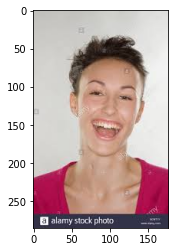

In [27]:
plt.imshow(image)

[[2.6720027e-03 9.6402429e-05 7.2861011e-03 9.2607707e-01 4.3239691e-03
  2.6641808e-02 3.2902665e-02]]


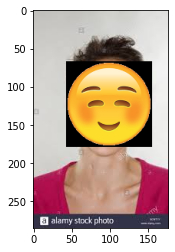

In [28]:
for face, (x, y, w, h) in find_faces(image):
    prediction = expr(face)
    # /content/4.png
    idir = '/content/' + str(prediction) + '.png'
    # print(idir)

    em = cv2.imread(idir)
    em = cv2.cvtColor(em,cv2.COLOR_RGB2BGR)
    em = cv2.resize(em, (w, h))
    image[y:y+h,x:x+w] = em
    plt.imshow(image)

    